In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')

In [21]:
# read the column description
dict_df = pd.read_csv("Cricket.csv", sep=",",encoding="ISO-8859-1", header=0)
dict_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [22]:
dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [23]:
df = dict_df[['SR','Ave', 'Player']]
df.head()

,SR,Ave,Player
0,86.23,44.83,SR Tendulkar (INDIA)
1,78.86,41.98,KC Sangakkara (Asia/ICC/SL)
2,80.39,42.03,RT Ponting (AUS/ICC)
3,91.20,32.36,ST Jayasuriya (Asia/SL)
4,78.96,33.37,DPMD Jayawardene (Asia/SL)


In [24]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Player', axis = 1))


In [25]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])

In [26]:
df_scaled.head()

,SR,Ave
0,0.703152,1.072294
1,-0.044139,0.587725
2,0.110997,0.596226
3,1.207091,-1.047909
4,-0.034000,-0.876185


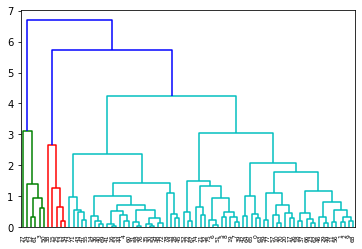

In [27]:
# complete linkage
mergings = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [28]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 3, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 0, 1, 2, 0, 2, 2, 0, 2, 3, 2, 2, 0, 3, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2])

In [30]:
df['cluster'] = cluster_labels

In [31]:
df.head()

,SR,Ave,Player,cluster
0,86.23,44.83,SR Tendulkar (INDIA),0
1,78.86,41.98,KC Sangakkara (Asia/ICC/SL),0
2,80.39,42.03,RT Ponting (AUS/ICC),0
3,91.20,32.36,ST Jayasuriya (Asia/SL),1
4,78.96,33.37,DPMD Jayawardene (Asia/SL),2


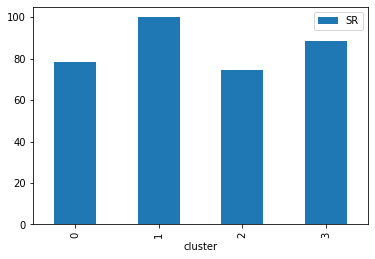

In [33]:
varlist = ['SR', 'cluster']
df[varlist].groupby('cluster').mean().plot(kind = 'bar')

In [35]:
df[df['cluster'] == 0]

,SR,Ave,Player,cluster
0,86.23,44.83,SR Tendulkar (INDIA),0
1,78.86,41.98,KC Sangakkara (Asia/ICC/SL),0
2,80.39,42.03,RT Ponting (AUS/ICC),0
5,74.24,39.52,Inzamam-ul-Haq (Asia/PAK),0
6,72.89,44.36,JH Kallis (Afr/ICC/SA),0
7,73.70,41.02,SC Ganguly (Asia/INDIA),0
8,71.24,39.16,R Dravid (Asia/ICC/INDIA),0
9,79.51,40.48,BC Lara (ICC/WI),0
10,86.23,39.27,TM Dilshan (SL),0
11,75.10,41.71,Mohammad Yousuf (Asia/PAK),0
